# Regularized DEM Inversion
This notebook will use the method of [Hannah et al. (2012)](https://ui.adsabs.harvard.edu/#abs/2012A&A...539A.146H/abstract) to perform a DEM inversion using regularization. We'll try to implement several of the examples included in the [GitHub repository](https://github.com/ianan/demreg).

In [0]:
dem_reg_root='/home/wtb2/Documents/demreg/idl_org/' ;change this to wherever you've downloaded the demreg code

## Example 1
First get the AIA response functions from a file and load them into a data structure. We'll reorder the channels and exclude the 304 Å channel.

In [1]:
restore,file=dem_reg_root+'aia_respn.dat'

In [2]:
filt=[0,1,2,3,4,6]

We'll use some model AIA (pixel) observations in units of DN pixel$^{-1}$ s$^{-1}$.

In [3]:
dn_in=[274.2, 166.9, 2842.9, 8496.3, 6941.9, 876.1]

We also include errors for each measurement, i.e. due to the read and photon noise

In [4]:
edn_in=[14.9, 10.9, 41.1, 65.3, 47.1, 14.1]

Reshape the response function and temperature data.

In [5]:
TRmatrix=tresp.all[*,filt]

In [6]:
logt=tresp.logte

Next, set some parameters for the regularization procedure:
* order of regularization (default is 0$\mathrm{th}$
* control of regularization parameter in $\mathrm{DEM}$-space
* whether or not to use guess solution in final regularization, default is no

In [7]:
order=0
reg_tweak=1
guess=0.

Now we need to compile the `data2dem_reg` procedure so that we can use it.

In [18]:
.compile '/home/wtb2/Documents/demreg/idl_org/data2dem_reg'
.compile '/home/wtb2/Documents/demreg/idl_org/dem_inv_gsvdcsq'
.compile '/home/wtb2/Documents/demreg/idl_org/dem_inv_reg_parameter'
.compile '/home/wtb2/Documents/demreg/idl_org/dem_inv_reg_solution'
.compile '/home/wtb2/Documents/demreg/idl_org/dem_inv_make_constraint'
.compile '/home/wtb2/Documents/demreg/idl_org/dem_inv_reg_resolution'
.compile '/home/wtb2/Documents/demreg/idl_org/dem_inv_confidence_interval'

% Procedure was compiled while active: DATA2DEM_REG. Returning.


In [38]:
reg=data2dem_reg(logT, TRmatrix, dn_in, edn_in,mint=5.7, maxt=7.3, nt=33,order=order,reg_tweak=reg_tweak, guess=guess,channels=tresp.channels[filt])

Regularization parameter (discrepancy):    3.4484571e-06
Regularization parameter (discrepancy):       0.38115614


Now we want to plot our results. First let's look at the resulting $\mathrm{DEM}(T)$ distribution.

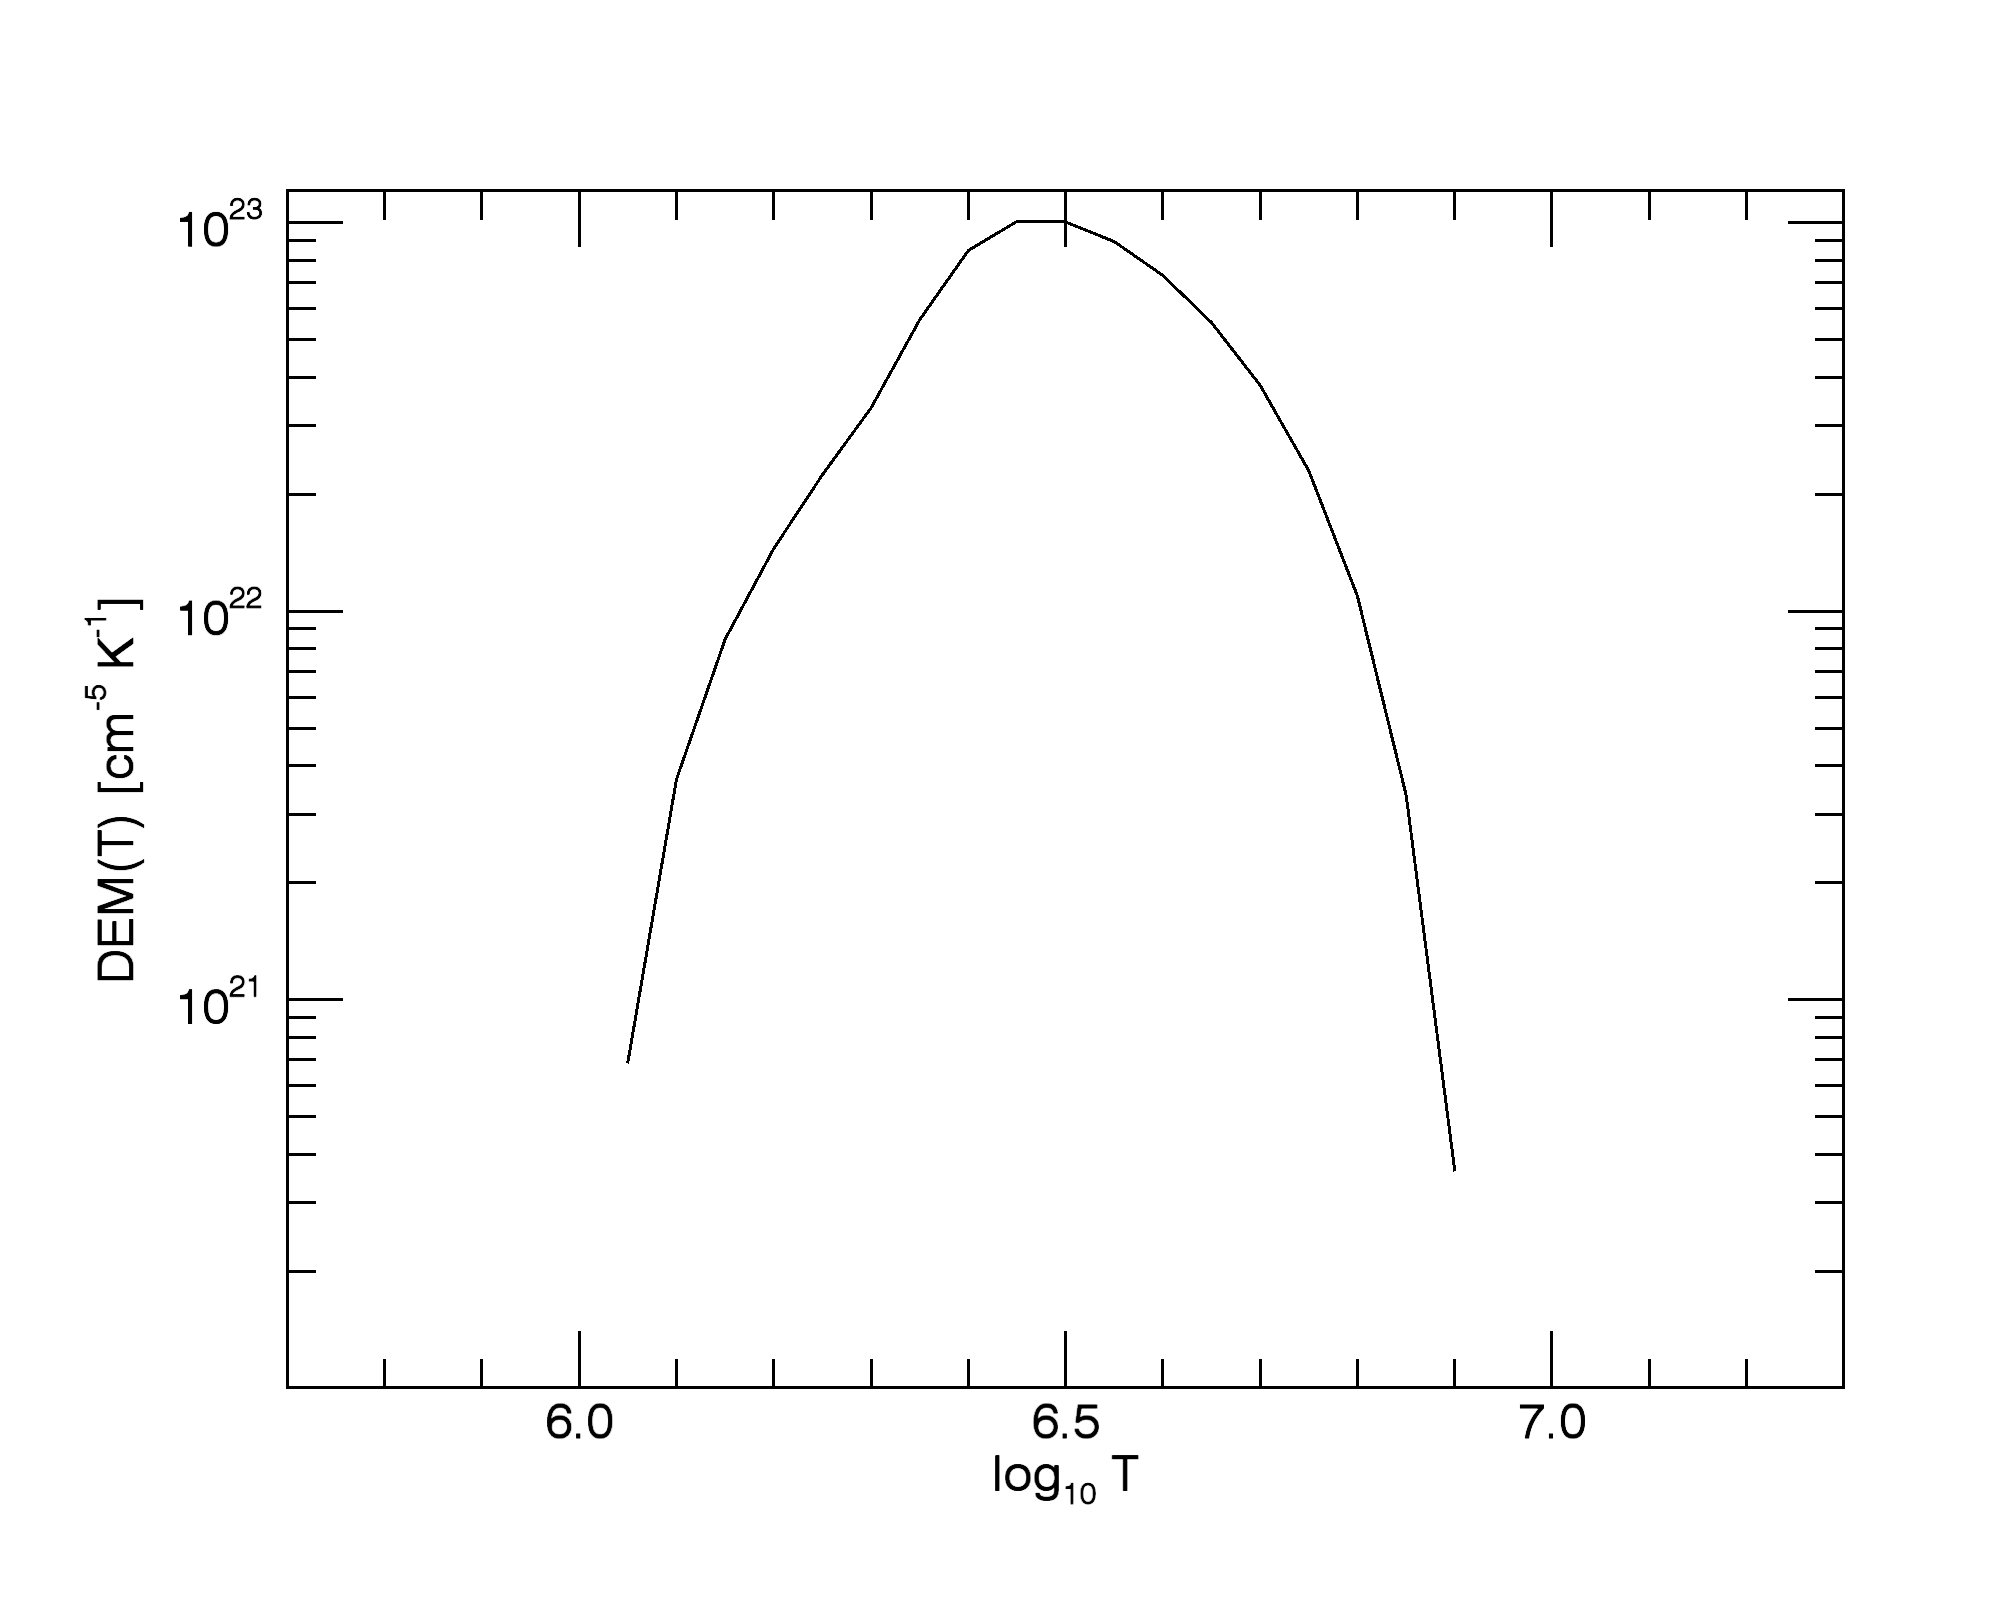

In [93]:
p = plot(reg.logt,reg.dem,yrange=max(reg.dem)*[1e-3,1.2],$
  xrange=[min(reg.logt),max(reg.logt)],xstyle=3,/ylog,$
  xtitle='log!D10!N T',ytitle='DEM(T) [cm!U-5!N K!U-1!N]')
ebar_t_minus = make_array(n_elements(reg.dem)-1)
ebar_t_plus = make_array(n_elements(reg.dem)-1)
ebar_dem_minus = make_array(n_elements(reg.dem)-1)
ebar_dem_plus = make_array(n_elements(reg.dem)-1)

for i=0,n_elements(ebar_t)-1 do ebar_t[i] = reg.logt[i]+reg.elogt[i]*(-1)

;plot(reg.logt+(reg.elogt*[-1,1]),reg.dem*[1,1],overplot=1) 
;plot(reg.logt*[1,1],reg.dem+(reg.edem*[-1,1]),overplot=1)

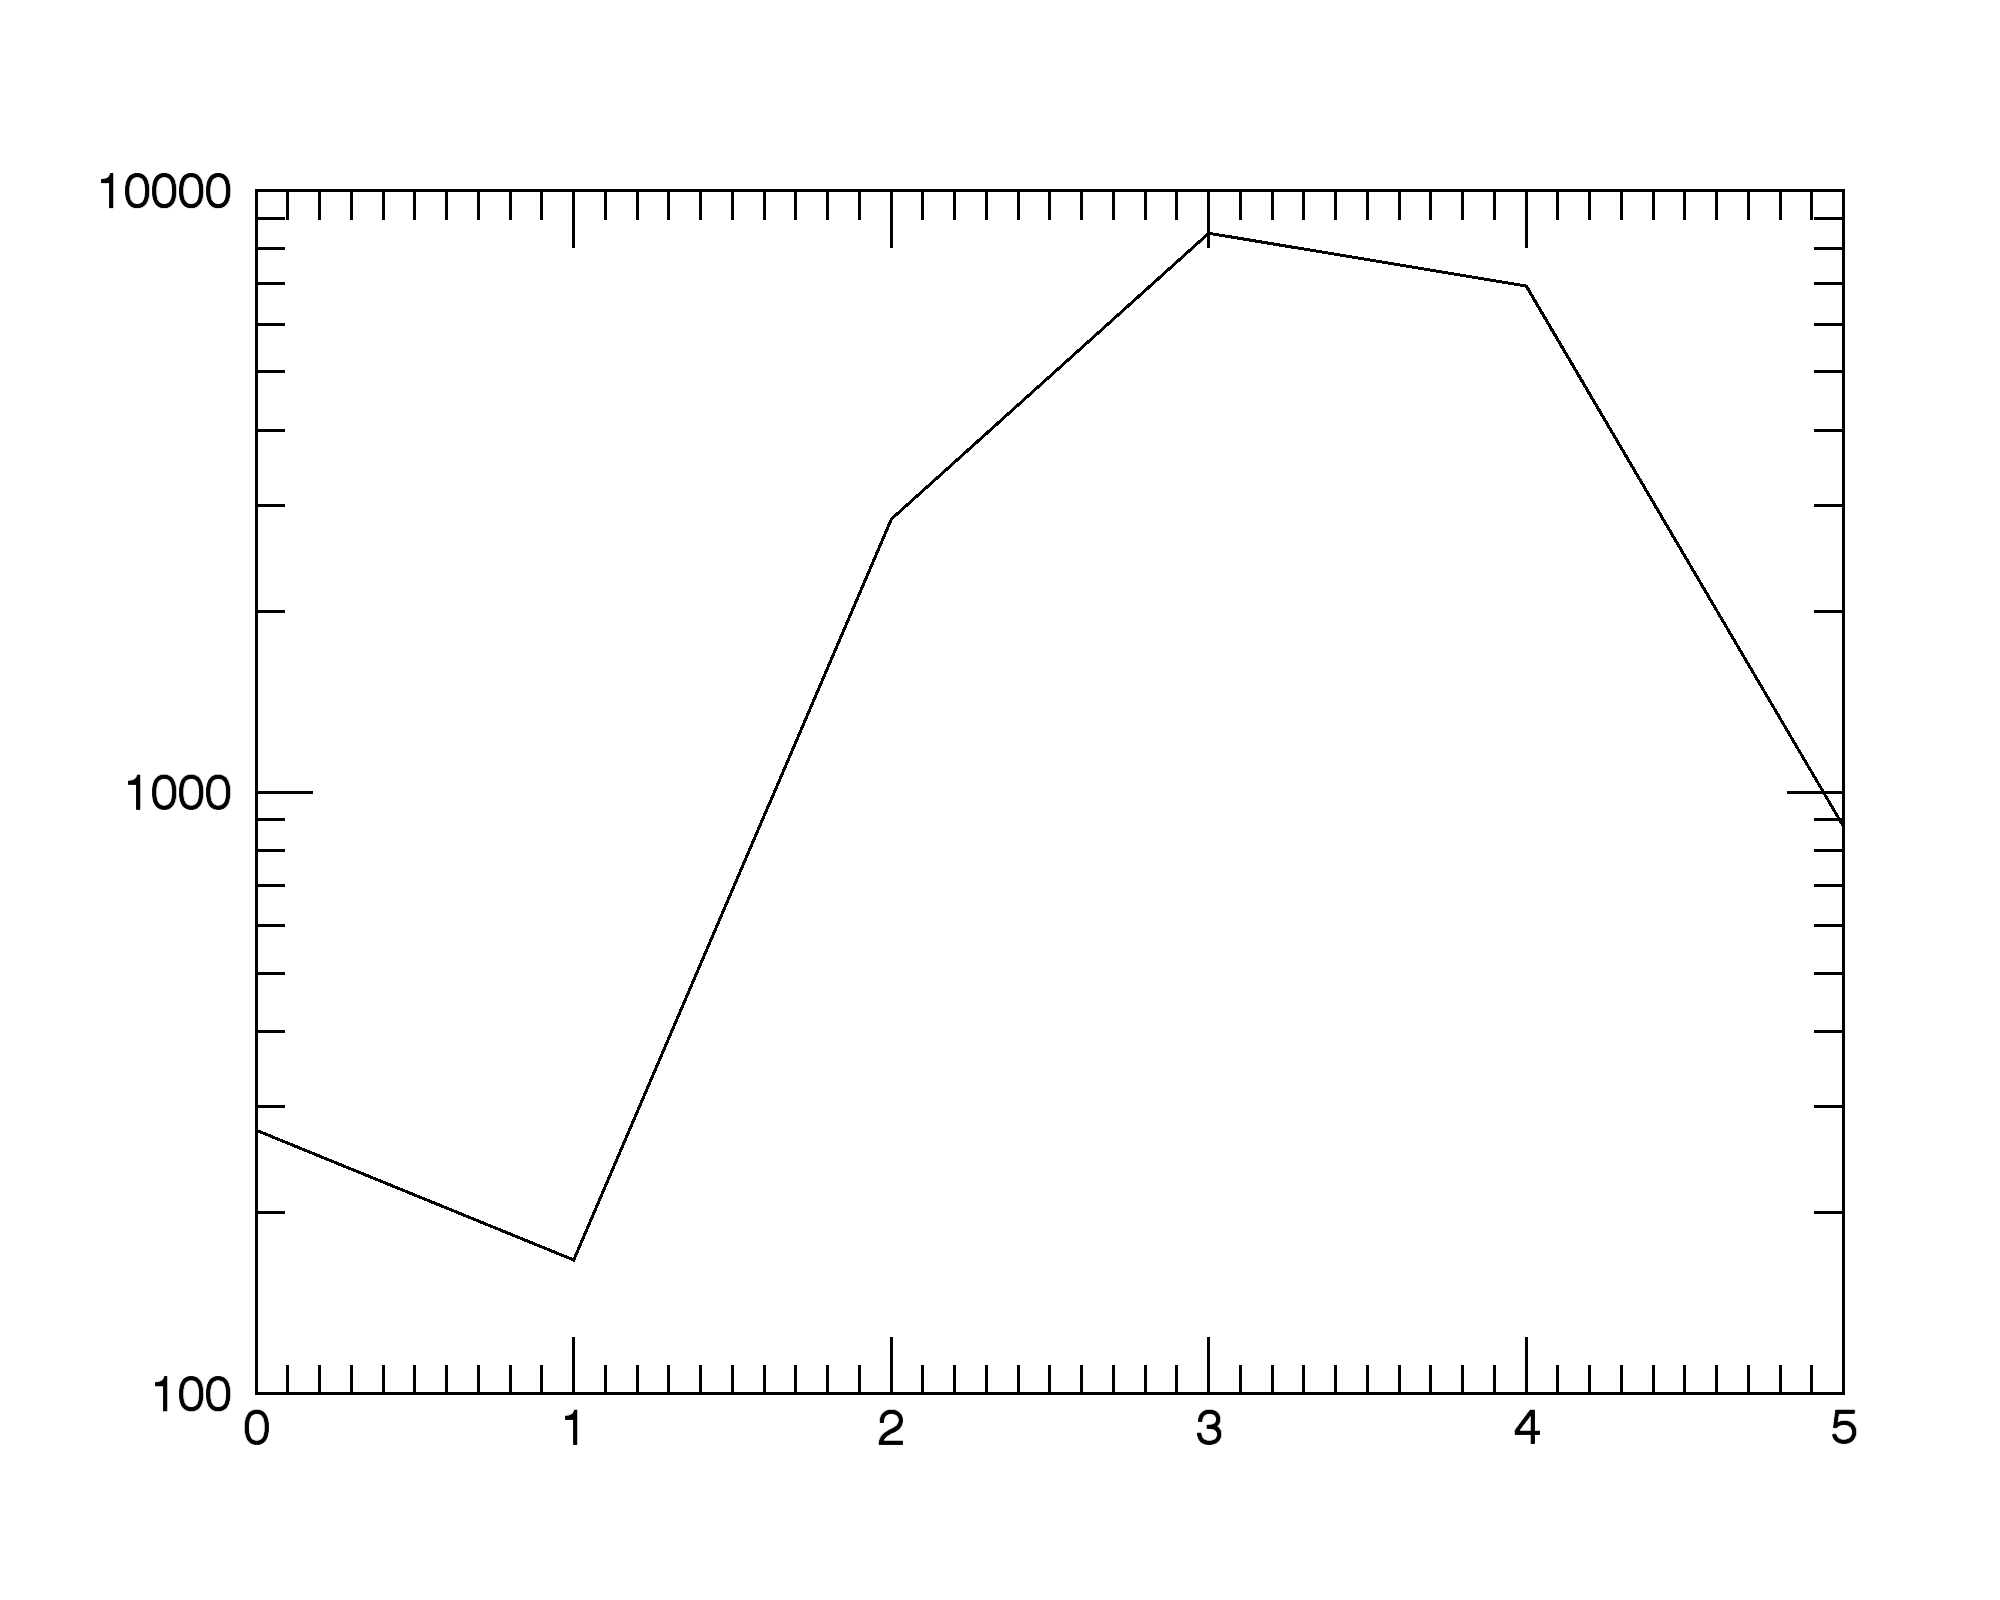

PLOT <110713>


In [101]:
nf=n_elements(reg.channels)
plot(indgen(nf),reg.data,/ylog)